## **Bernoulli Distribution**

The Bernoulli distribution is a probability distribution that describes the outcome of a single binary experiment, such as flipping a coin or making a yes-or-no decision.

The Bernoulli distribution is characterized by a single parameter, usually denoted by `p`, which represents the probability of a success (e.g., getting heads on a coin flip, or answering `yes` to a question). The probability of a failure (getting tails on a coin flip, or answering "no" to a question) is `1-p`.

The probability mass function (PMF) of the Bernoulli distribution is:

```
f(X = x) = p^x * (1-p)^(1-x), for x in {0,1}
```

- p	=	probability
- x	=	possible outcomes
- f	=	probability mass function


where X is a random variable that takes on the value 1 with probability p (i.e., a success), and 0 with probability 1-p (i.e., a failure).


## Tips DataSet

In [18]:
import seaborn as sns
import numpy as np

tips = sns.load_dataset('tips')

# Create a binary variable indicating whether the tip is greater than or equal to 10%
tips['tip_greater_than_10'] = np.where(tips['tip'] / tips['total_bill'] >= 0.1, 1, 0)
display(tips)

# Calculate the proportion of tips that are greater than or equal to 20%
p = tips['tip_greater_than_10'].mean()

# Define the Bernoulli distribution using the calculated proportion
pmf = [1-p, p]

# Print the PMF
print(pmf)

,total_bill,tip,sex,smoker,day,time,size,tip_greater_than_10
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0


[0.11065573770491799, 0.889344262295082]


## Coin Tosses

In [2]:
import numpy as np

# Set the probability of heads to 0.5
p = 0.5

# Simulate 10 coin tosses using the Bernoulli distribution
tosses = np.random.binomial(n=1, p=p, size=10)

# Print the results
print("Coin tosses:", tosses)
print("Number of heads:", np.sum(tosses))
print("Number of tails:", np.sum(1 - tosses))

Coin tosses: [0 0 0 0 1 1 1 1 0 0]
Number of heads: 4
Number of tails: 6


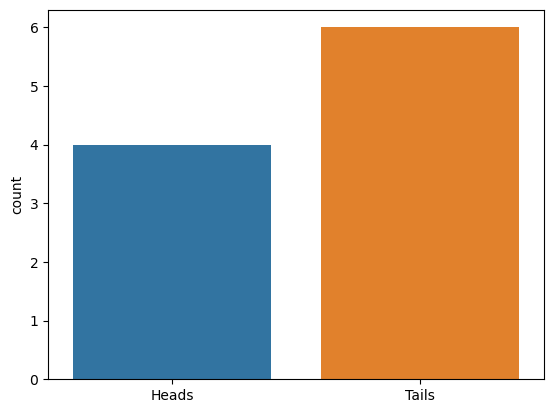

In [15]:
# plotting the toss
sns.countplot(x =tosses)
# set custom tick labels for x-axis
plt.xticks([0, 1], ['Heads', 'Tails'])
plt.show()

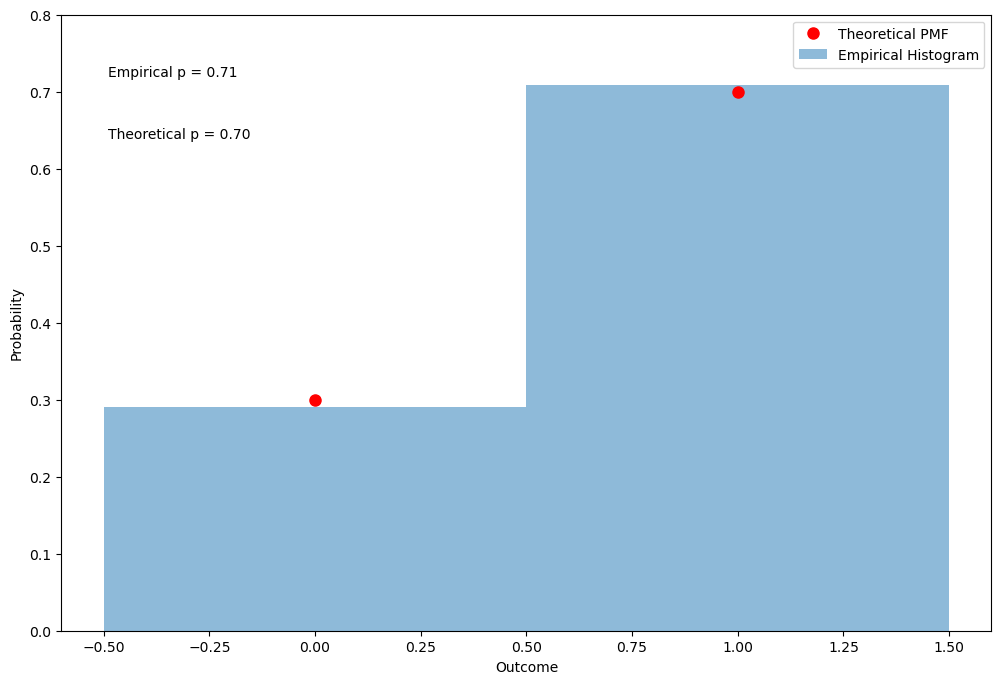

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# set the probability of success
p = 0.7

# generate 1000 random Bernoulli trials with probability p
trials = bernoulli.rvs(p, size=1000)

# calculate the empirical probability of success
empirical_p = np.mean(trials)

# create a histogram of the trials
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(trials, bins=[-0.5, 0.5, 1.5], alpha=0.5, density=True)

# overlay the theoretical PMF of the Bernoulli distribution
x = np.array([0, 1])
ax.plot(x, bernoulli.pmf(x, p), 'ro', ms=8)

# add labels and legend
ax.set_xlabel('Outcome')
ax.set_ylabel('Probability')
ax.legend(['Theoretical PMF', 'Empirical Histogram'])

# set the y-axis limit to the maximum PMF value
ax.set_ylim([0, max(bernoulli.pmf(x, p)) + 0.1])

# add text with the empirical and theoretical probabilities of success
ax.text(0.05, 0.9, 'Empirical p = {:.2f}'.format(empirical_p), transform=ax.transAxes)
ax.text(0.05, 0.8, 'Theoretical p = {:.2f}'.format(p), transform=ax.transAxes)

plt.show()
